### generate the pandas data

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from covid_screening_quantify import quantify_all_fovs, combine_all_quantify, write_conditions

In [ ]:
# test parameter
#image_folder = '/home/haoxu/data/test_data_20201218/40x'

In [ ]:
#quantify_all_fovs(image_folder)

In [ ]:
#processed_folder = '/home/haoxu/data/test_data_20201218/40x_processed'

### combine csv data of all images

In [ ]:
#processed_folder = "/home/haoxu/data/Images_processed"

In [ ]:
#combine_all_quantify(processed_folder)

### generate the pandas data end

### get the conditions

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
# write the conditions to csv
processed_folder = "/home/haoxu/data/Images_processed"
quantify_csv_file = os.path.join(processed_folder, 'quantify_all.csv')
condition_xlsx_file = 'test/Plate map test plates 2020-11-25.xlsx'
write_conditions(quantify_csv_file, condition_xlsx_file)

### define cell infection

In [ ]:
import pandas as pd
import os
from imageio import imread
from matplotlib import pyplot as plt
from skimage import segmentation, morphology, exposure
import numpy as np

In [ ]:
df = pd.read_csv('/home/haoxu/data/Images_processed/quantify_all.csv')

In [ ]:
# use the max 4 percent in infection channel
plt.hist(df.last4percentmean.to_list(), range=(0, 20000), bins=800)

In [ ]:
# define the threshold value based on the plot above
threshold_value = 4000

In [ ]:
df  = df.assign(**dict.fromkeys(["Infected"], 0))
df.loc[df.last4percentmean > threshold_value, 'Infected'] = 1

### define cell infection end

### verify cell _infection

In [ ]:
well_fovs = list(set(df.well_fov.to_list()))
#well_fovs

In [ ]:
import random
from covid_screening_quantify import show_infections

In [ ]:
# show a random sample to see if the infected cells are correctly picked out.
# if not, fine tune the threshold_value and run
well_fov = 'r02c16f04'#random.choice(well_fovs)
print(well_fov)
img = show_infections(df, well_fov, dim_er=True, contour=True, show_er=False)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(40, 40))
#ax = axes.ravel()
axes.imshow(img/img.max())

### get analysis result

In [1]:
from covid_screening_quantify import plate_plots, plate_infection

** TORCH CUDA version installed and working. **


In [2]:
processed_folder = "/home/haoxu/data/Images_processed"
#infection_data = plate_infection(processed_folder, infection_threshold=3000)
#infection_data

### plot plate map for infections

In [3]:
#import seaborn as sns; sns.set_theme()

/home/haoxu/miniconda3/envs/cellpose_torch/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/haoxu/miniconda3/envs/cellpose_torch/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/haoxu/miniconda3/envs/cellpose_torch/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


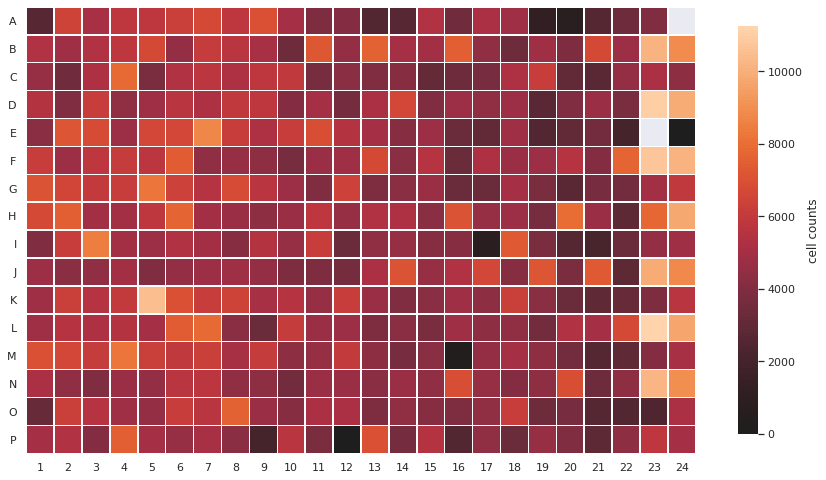

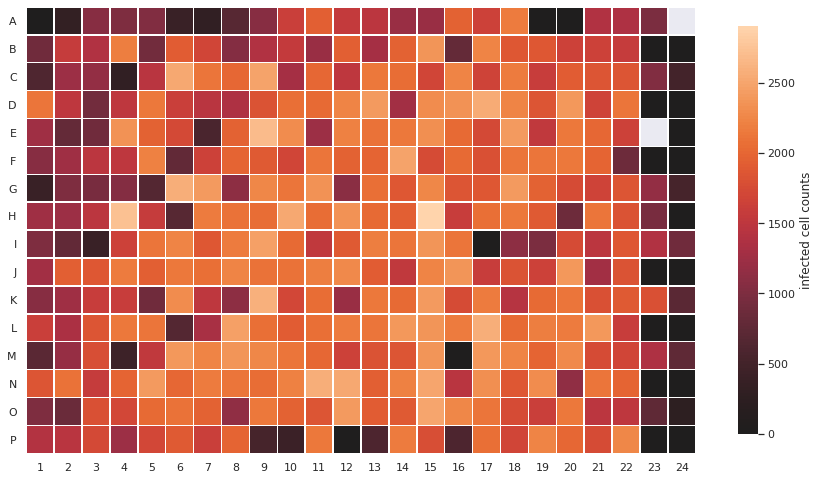

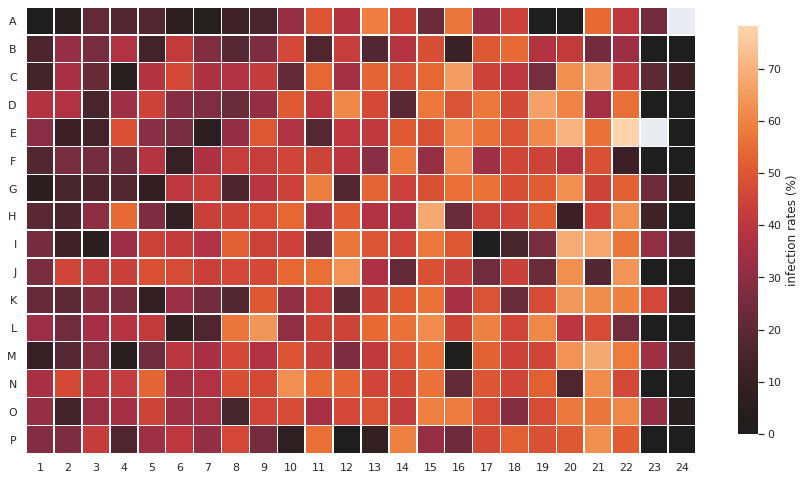

<Figure size 720x1440 with 0 Axes>

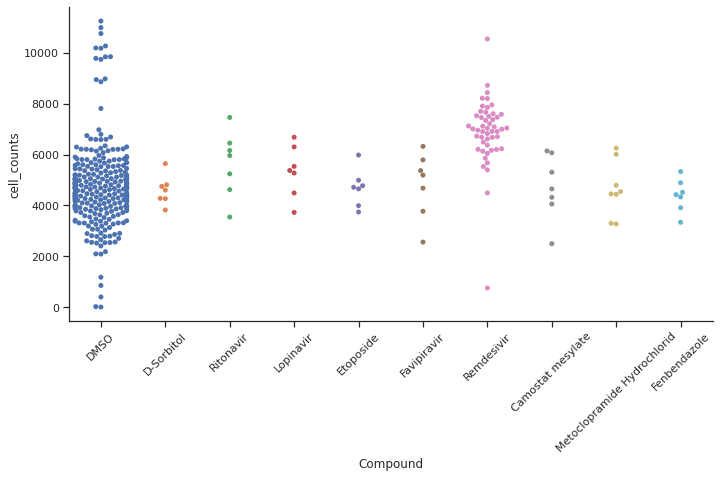

<Figure size 720x1440 with 0 Axes>

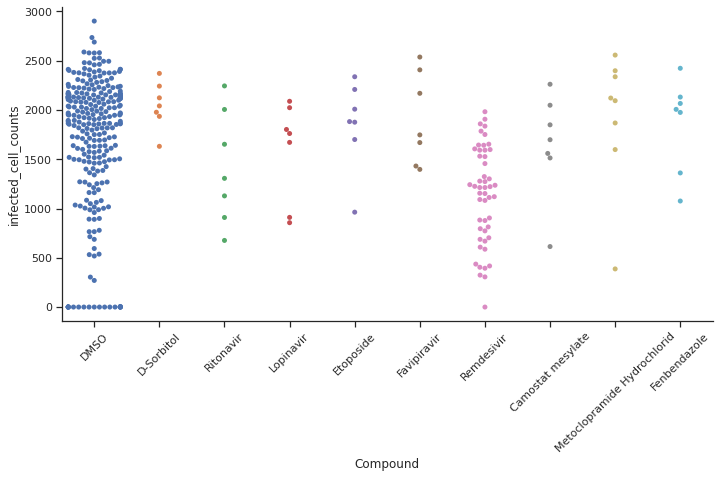

<Figure size 720x1440 with 0 Axes>

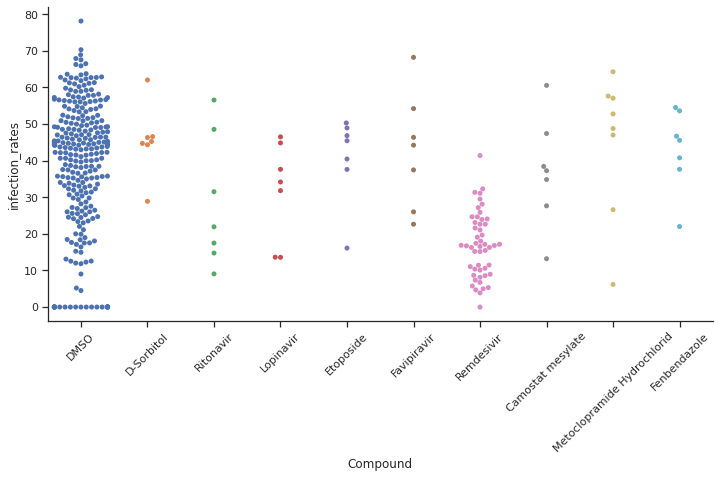

In [4]:
plate_plots(processed_folder, infection_threshold=4000)